In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data= pd.read_excel('OutputScriptMarie_KovatsMatchOnly70.xlsx.xlsx', sheetname ='to use for NDMS')

In [4]:
#NORMALIZATION DATA BY SUM
for i in range(0, data.shape[0]):
    data.iloc[i, 2:] = data.iloc[i,2:] / sum(data.iloc[i,2:])

In [5]:
#SUBSET DATA BY SPECIES FOR PLOT MEAN ABUNDANCE CHEMICAL
data_Obt = data.iloc[0:39, :]
data_Dil = data.iloc[53:70, :]
data_Stri = data.iloc[88:105, :]
data_Cil = data.iloc[105:111, :] 
data_Hur = data.iloc[78:88, :]

In [6]:
print 'The sample size of each group is', data_Obt.shape,  data_Dil.shape,  data_Stri.shape,  data_Cil.shape,  data_Hur.shape

The sample size of each group is (39, 56) (17, 56) (17, 56) (6, 56) (10, 56)


In [7]:
##MEAN FOR PLOT ABUNDANCE~CHEMICAL FOR EACH SPECIES
Size = data_Obt.shape[1]
MeanObt = np.zeros(Size)
MeanDil = np.zeros(Size)
MeanStri = np.zeros(Size)
MeanCil = np.zeros(Size)
MeanHur = np.zeros(Size)

for i in range(1, Size-1):
    MeanObt[i] = np.mean(data_Obt.values[:, i+1])
    MeanDil[i] = np.mean(data_Dil.values[:, i+1])
    MeanStri[i] = np.mean(data_Stri.values[:, i+1])
    MeanCil[i] = np.mean(data_Cil.values[:, i+1])
    MeanHur[i] = np.mean(data_Hur.values[:, i+1])

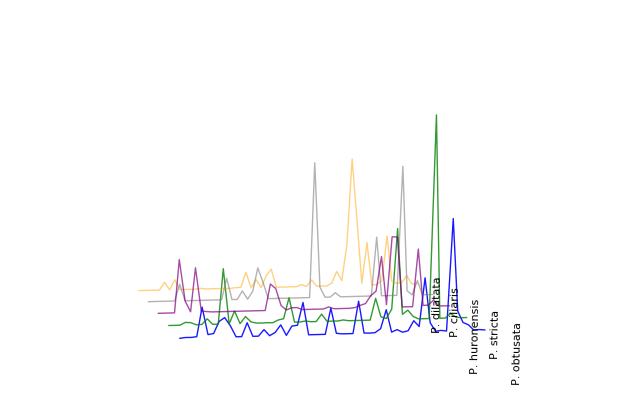

In [10]:
#PLOT 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = Axes3D(fig)

ax.plot(range(0, Size),[0]*Size, MeanObt, c = 'blue', alpha= 0.9)
ax.plot(range(0, Size),[2]*Size, MeanStri, c = 'green', alpha = 0.8)
ax.plot(range(0, Size),[8]*Size, MeanDil, c='orange', alpha = 0.5)
ax.plot(range(0, Size),[6]*Size, MeanCil, c='gray', alpha = 0.6)
ax.plot(range(0, Size),[4]*Size, MeanHur, c='purple', alpha = 0.7)
#ax.set_zlim(0, 1)
ax.view_init(elev=10, azim=-100)
ax.axis('off')
ax.text(Size+4, 0, 0, "P. obtusata", (1, 0, 1), color='black', fontsize=8)
ax.text(Size+3.5, 2, 0, "P. stricta", (1, 0, 1), color='black', fontsize=8)
ax.text(Size+3, 4, 0, "P. huronensis", (1, 0, 1), color='black', fontsize=8)
ax.text(Size+2.5, 6, 0, "P. ciliaris", (1, 0, 1), color='black', fontsize=8)
ax.text(Size+2, 8, 0, "P. dilatata", (1, 0, 1), color='black', fontsize=8)

##NO IDEA WHY THE LABELS GO DOWN & VERTICALLY NOW......

In [11]:
Cil = np.repeat(1, data_Cil.shape[0])
Dil = np.repeat(2, data_Dil.shape[0])
Str = np.repeat(3, data_Stri.shape[0])
Obt = np.repeat(0, data_Obt.shape[0])
Hur = np.repeat(4, data_Hur.shape[0])
Species = np.concatenate((Obt, Dil, Str, Cil, Hur))

dataAll = np.vstack((data_Obt, data_Dil, data_Stri, data_Cil, data_Hur))

from sklearn.decomposition import PCA
pcaExp = PCA()
pcaExp.fit(dataAll[:, 2:])
print pcaExp.components_.shape[0],'components come out of this decomposition'#


54 components come out of this decomposition


12 components are required to explain 90% of the variance in the data


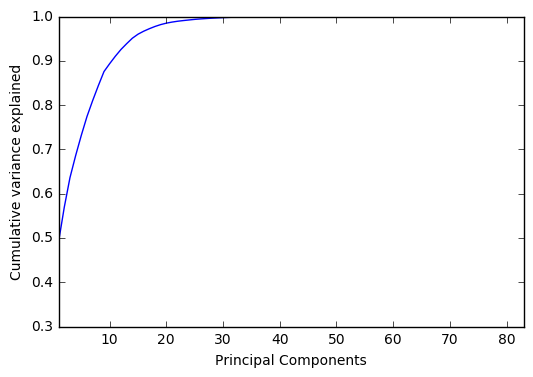

In [12]:
plt.plot(np.cumsum(pcaExp.explained_variance_ratio_))
plt.ylabel('Cumulative variance explained')
plt.xlabel('Principal Components')
plt.xlim(1,83)


CumSumExp = np.cumsum(pcaExp.explained_variance_ratio_)
for i in range(0, len(CumSumExp)):
    if CumSumExp[i] >= 0.9:
        print i+1, 'components are required to explain 90% of the variance in the data'
        break

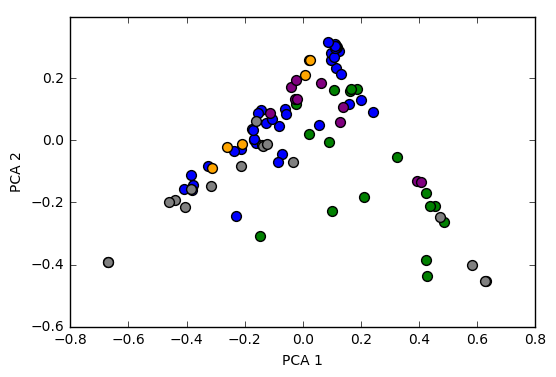

In [13]:
All_red = pcaExp.transform(dataAll[:, 2:])
Species = np.concatenate((Obt, Dil, Str, Cil, Hur))
col = ['blue',  'orange','green', 'gray', 'purple']
i=0
for types in set(Species):
    plt.scatter(All_red[Species==types, 0].flatten(),
            All_red[Species==types, 1].flatten(),
            c=col[i], s=50)
    i+=1
    #plt.legend(set(Species2))
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    #plt.xlim(-0.05*1e8, 0.15*1e8)
    #plt.ylim(-0.5*1e7, 0.2*1e7)

In [15]:
def test_train_id(N, test_frac):
    Samples = np.arange(0,N)
    Fraction = test_frac*N
    test = np.random.choice(range(0,N), round(Fraction))
    train = np.delete(Samples, test)
    return test, train   

In [21]:
def cross_val_class_accuracy(model, X, y, r, test_frac, reps):
    Accuracy = np.zeros(reps)
    for i in range(reps):
        test, train = test_train_id(89, test_frac)
        DataTest = X[test, :]
        DataTrain = X[train, :]
        pcaExp_train = PCA(r)
        pcaExp_train.fit(DataTrain)
        #pcaExp_test = PCA(r)
        #pcaExp_test.fit(DataTest)
        Train_red = pcaExp_train.transform(DataTrain)
        Test_red = pcaExp_train.transform(DataTest)
        mymodel = model
        model.fit(Train_red, y[train])
        Predict = model.predict(Test_red)
        Accuracy[i] = np.mean(Predict == y[test])
    cv_acc = np.mean(Accuracy)
    return cv_acc

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn import tree

KNN2 = cross_val_class_accuracy(KNeighborsClassifier(5), dataAll[:, 2:], Species, 10, 0.2, 200)
LDA5 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), dataAll[:, 2:], Species, 10, 0.2, 200)
LDA20 = cross_val_class_accuracy(LinearDiscriminantAnalysis(), dataAll[:, 2:], Species, 20, 0.2, 200)
SVM20 = cross_val_class_accuracy(SVC(kernel='linear'), dataAll[:, 2:], Species, 10, 0.2, 200)
DT20 = cross_val_class_accuracy(tree.DecisionTreeClassifier(), dataAll[:, 2:], Species, 10, 0.2, 200)    

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


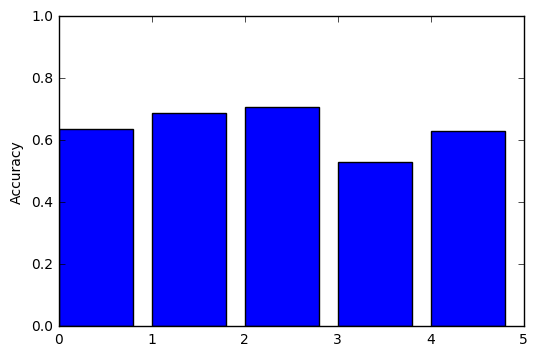

In [27]:
plt.bar(range(5), [KNN2, LDA5, LDA20, SVM20, DT20])
plt.ylim(0,1)
plt.ylabel('Accuracy')
#HAVE TO LABEL PLOT (MAYBE ADD SD?)